In [1]:
project      = 'hoshinolab_proteomics_age'
from bin import nimb_link
NIMB_HOME = nimb_link.link_with_nimb()
from setup.get_vars import Get_Vars, SetProject
from distribution import utilities as utils
from stats.db_processing import Table
from stats.preprocessing import Preprocess
from stats import preprocessing, varia
from stats.make_stats_grid import MakeGrid
from stats.stats_models import ANOVA_do
from stats.plotting import Make_Plot_Regression, Make_plot_group_difference
from stats import predict
tab = Table()

all_vars = Get_Vars()
project_vars = all_vars.projects[project]

getvars      = Get_Vars()
nimb_stats   = getvars.stats_vars
projects     = getvars.projects
NIMB_tmp     = getvars.location_vars['local']['NIMB_PATHS']['NIMB_tmp']
fname_groups = projects[project]["fname_groups"]
nimb_stats   = SetProject(NIMB_tmp, nimb_stats, project, fname_groups).stats
project_vars = projects[project]
stats_paths  = nimb_stats['STATS_PATHS']
vars_glm     = project_vars['variables_for_glm']

/home/ssp/Dropbox/github/nimb/nimb


In [194]:
# ATTENTION: prediction_target MUST be a group column, that will be converted to y_label
# extracting features based on PCA
def get_X_data_per_group_all_groups(group, predicted_target):
    # extract X_scaled values for the brain parameters
        if group == 'all':
                df_clin_group = df_user_stats
                df_X          = df_adjusted
                y_labeled     = preprocessing.label_y(df_user_stats, predicted_target)
                X_scaled      = preprocessing.scale_X(df_X)
        else:
                df_group      = tab.get_df_per_parameter(df_final_grid, project_vars['group_col'], group)
                df_clin_group = df_group.copy()
                df_X          = df_group.drop(columns = [project_vars['group_col']])
                y_labeled     = preprocessing.label_y(df_group, predicted_target)
                X_scaled      = preprocessing.scale_X(df_X)
        return df_X, y_labeled, X_scaled, df_clin_group

In [127]:
from os import path
def get_features_df_per_group(group, X_scaled, y_labeled, df_X, pca_threshold, path2save, use_features=True):
        features_rfe_and_rank_df = 'none'
        if use_features:
            if feature_algo == 'PCA':# using PCA
                    features = predict.get_features_based_on_pca(
                                        path2save,
                                        pca_threshold,
                                        X_scaled, cols_X,
                                        group, atlas, lang)
            elif feature_algo == 'RFE': # using RFE
                    features, features_rfe_and_rank_df = predict.feature_ranking(X_scaled,
                                                                        y_labeled,
                                                                        self.cols_X)
                    print("    number of features extracted by RFE: ",len(features_rfe_and_rank_df.feature))
            df_with_features = tab.get_df_from_df(df_X, usecols = features)
        else:
            df_with_features = tab.get_df_from_df(df_X, usecols = cols_X)
            features = cols_X
        return df_with_features, features, features_rfe_and_rank_df

In [2]:
from bin.vars import VARS
materials_DIR = project_vars['materials_DIR'][1]
vars = VARS(materials_DIR, project_vars)

src_f = vars.f_src()['grid_file']
lav_src_f = vars.lav_f_src()['grid_file']

In [3]:
lav_src_df = tab.get_df(lav_src_f)
lav_src_df.head()

    reading file: /home/ssp/Dropbox/pAyuko/materials/lav_organ_source_grid.csv,
        sheet: 0


,protein id,adipose,adrenal gland,amnion,bladder,blood,blood vessel,bone,bone marrow,brain,...,spleen,stomach,testis,thymus,thyroid,tonsil,trachea,umbilical cord,ureter,uterus
0,P69905,0.004847,0.011219,0.010555,0.030142,0.010239,0.051392,0.009597,0.017992,0.015318,...,0.032616,0.015616,0.009346,0.007890,0.008054,0.034810,0.012445,0.018774,0.000154,0.005390
1,G3V1N2,0.006817,0.019399,0.014767,0.045766,0.011010,0.080456,0.010308,0.022191,0.014098,...,0.047128,0.020931,0.012628,0.008145,0.009158,0.038922,0.020029,0.025757,0.000206,0.006325
2,P02042,0.005444,0.011160,0.011123,0.035269,0.010669,0.055326,0.010356,0.019333,0.014462,...,0.032344,0.015586,0.010299,0.008546,0.008912,0.048716,0.012094,0.021290,0.000165,0.005063
3,P68871,0.004528,0.011348,0.008678,0.029972,0.008632,0.052725,0.008581,0.016143,0.011682,...,0.028933,0.012684,0.009274,0.006555,0.006687,0.037350,0.011453,0.017350,0.000100,0.003789
4,P02768,0.014359,0.059679,0.016183,0.034624,0.016924,0.091760,0.022820,0.038666,0.026656,...,0.064551,0.033525,0.029442,0.011786,0.009376,0.016735,0.086394,0.019969,0.000246,0.012108


In [5]:
src_df = tab.get_df(src_f)
src_df.head()

    reading file: /home/ssp/Dropbox/pAyuko/materials/grid.csv,
        sheet: 0


,sample name,control1_mom,control2_dad,control_dad_Jon,control_mom_HZ,AH,DG,FS,SS,EA,...,PAT_5_DAD,PAT_9_DAD,PAT_11_DAD,PAT_12_DAD,PAT_23_DAD,PAT_24_DAD,PAT_25_DAD,PAT_26_DAD,PAT_28_DAD,PAT_34_DAD
0,A0A024QZ42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0A024R6I7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.380147e+09,4.064809e+09,1.387224e+10,9.784971e+09,6.814765e+08,1.023226e+10,1.058499e+10,7.294337e+09,1.206384e+10,2.149113e+10
2,A0A075B6H6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.504637e+10,7.877767e+10,4.155060e+10,1.949518e+10,7.845376e+09,2.236716e+10,2.245881e+10,3.233661e+10,2.352911e+10,1.933386e+10
3,A0A075B6H7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.812075e+09,2.512911e+09,1.367624e+07,4.183046e+09,0.000000e+00,4.900771e+09,5.727654e+09,7.577806e+09,1.396810e+07,1.181673e+09
4,A0A075B6H9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.404343e+08,1.370772e+09,0.000000e+00,9.539774e+08,4.922092e+07,3.265627e+08,1.059017e+08,9.322918e+08,0.000000e+00,2.599797e+07


In [6]:
print(src_df.shape, lav_src_df.shape)

(3009, 79) (308, 53)


In [42]:
df_user_stats, df_final_grid,\
            df_adjusted,\
            cols_X,\
            groups = MakeGrid(project_vars,
                                nimb_stats).grid()

    reading file: /media/g/nimb_tmp/projects/hoshinolab_proteomics_age/stats_src/stats/stats_src.xlsx,
        sheet: 0
    reading file: /media/g/nimb_tmp/projects/hoshinolab_proteomics_age/stats_src/stats/grid.csv,
        sheet: 0


In [77]:
#this grid has an error, as the former index is being saved as a column and must be removed
col2rm = [i for i in df_final_grid.columns if 'CON' in i]+['Unnamed: 0']
df_final_grid.drop(columns=col2rm, inplace=True)
df_adjusted.drop(columns=col2rm, inplace=True)
cols_X.remove('Unnamed: 0')
cols_X.remove('CON_00708398_1')
cols_X.remove('CON_LysC')
cols_X.remove('CON_Trypsin')

In [48]:
# DONE: STEP 1 ANOVA
# DONE: STEP 2 Simple Linear Regression

features = cols_X # [i for i in cols_X if i not in cols_with_zeros+[col2rm,]]
vars_glm = cols_X #features#[i for i in vars_glm if i not in cols_with_zeros+[col2rm,]]

# for ANOVA zeros must be removed

sig_cols = ANOVA_do(df_final_grid,
                    vars_glm, features,
                    varia.get_dir(stats_paths['anova']),
                    p_thresh = 0.05, intercept_thresh = 0.05).sig_cols
Make_Plot_Regression(df_final_grid,
                    sig_cols, project_vars['group_col'],
                    varia.get_dir(stats_paths['simp_lin_reg_dir']))
#Make_plot_group_difference(df_final_grid,
#                            sig_cols, project_vars['group_col'], groups,

#                            varia.get_dir(stats_paths['anova']))

    analysing 51 features for parameter: A6NNI4
    analysing 51 features for parameter: O43866
    analysing 51 features for parameter: P00450
    analysing 51 features for parameter: P00488
    analysing 51 features for parameter: P00739
    analysing 51 features for parameter: P01008
    analysing 51 features for parameter: P01009
    analysing 51 features for parameter: P01011
    analysing 51 features for parameter: P01023
    analysing 51 features for parameter: P01024
    analysing 51 features for parameter: P01031
    analysing 51 features for parameter: P01593
    analysing 51 features for parameter: P01597
    analysing 51 features for parameter: P01625
    analysing 51 features for parameter: P01764
    analysing 51 features for parameter: P01767
    analysing 51 features for parameter: P01781
    analysing 51 features for parameter: P01833
    analysing 51 features for parameter: P01859
    analysing 51 features for parameter: P01876
    analysing 51 features for parameter:

In [95]:
# DONE: STEP 3 PCA features extract

df_user_stats, df_final_grid,\
            df_adjusted,\
            cols_X,\
            groups = MakeGrid(project_vars,
                                nimb_stats).grid()

    reading file: /media/g/nimb_tmp/projects/hoshinolab_proteomics_age/stats_src/stats/stats_src.xlsx,
        sheet: 0
    reading file: /media/g/nimb_tmp/projects/hoshinolab_proteomics_age/stats_src/stats/grid.csv,
        sheet: 0


In [96]:
col2rm = [i for i in df_final_grid.columns if 'CON' in i]+['Unnamed: 0']
df_final_grid.drop(columns=col2rm, inplace=True)
df_adjusted.drop(columns=col2rm, inplace=True)
cols_X.remove('Unnamed: 0')
cols_X.remove('CON_00708398_1')
cols_X.remove('CON_LysC')
cols_X.remove('CON_Trypsin')

# group param is removed to exclude from prediction algo
group = 'all'
predicted_target = project_vars["prediction_target"]
col2rm = project_vars['group_param']
df_user_stats.drop(columns=[col2rm], inplace=True)
df_final_grid.drop(columns=[col2rm], inplace=True)
df_adjusted.drop(columns=[col2rm], inplace=True)
cols_X.remove(col2rm)
print(f'y_labeled predicted target is: {predicted_target}, EXCLUDED: {col2rm}, group parameter')

y_labeled predicted target is: ['group'], EXCLUDED: age, group parameter


PowerTransformer()
    nr of features to analyze by PCA: 50
    PCA chose 18 components and 16 features 
P13671 not defined
P60709 not defined
O43866 not defined
P22792 not defined
P02745 not defined
P02776 not defined
P01876 not defined
Q08380 not defined
P02042 not defined
P61981 not defined
A6NNI4 not defined
P26038 not defined
P02765 not defined
P00488 not defined
P01593 not defined
P02775 not defined


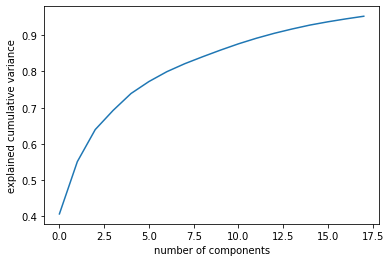

In [104]:
df_X, y_labeled, X_scaled, df_clin_group = get_X_data_per_group_all_groups(group, predicted_target)

# ================================
use_features = True
feature_algo = "PCA"
atlas = "DK"
lang='EN'
features = cols_X #specific for the hoshinolab_proteomics_age project
pca_threshold = 0.95#nimb_stats["STATS_PARAMS"]["prediction_vars"]['pca_threshold']
df_with_features, features, features_rfe_and_rank_df = get_features_df_per_group(group, X_scaled, y_labeled,
                                                                                 df_X, pca_threshold, use_features)

In [99]:
vars_glm = features
sig_cols = ANOVA_do(df_final_grid,
                    vars_glm, features,
                    varia.get_dir(stats_paths['anova']),
                    p_thresh = 0.05, intercept_thresh = 0.05).sig_cols

    analysing 16 features for parameter: P13671
    analysing 16 features for parameter: P60709
    analysing 16 features for parameter: O43866
    analysing 16 features for parameter: P22792
    analysing 16 features for parameter: P02745
    analysing 16 features for parameter: P02776
    analysing 16 features for parameter: P01876
    analysing 16 features for parameter: Q08380
    analysing 16 features for parameter: P02042
    analysing 16 features for parameter: P61981
    analysing 16 features for parameter: A6NNI4
    analysing 16 features for parameter: P26038
    analysing 16 features for parameter: P02765
    analysing 16 features for parameter: P00488
    analysing 16 features for parameter: P01593
    analysing 16 features for parameter: P02775
{'P13671': {'P22792': {'pvalues': 2.7072120532658494e-06, 'intercept': 0.0013892976505279506, 'meas': 'P22792', 'struct': 'P22792'}, 'P02042': {'pvalues': 0.0027766536149174707, 'intercept': 0.0008298095586704787, 'meas': 'P02042', 

In [100]:
Make_Plot_Regression(df_final_grid,
                    sig_cols, project_vars['group_col'],
                    varia.get_dir(stats_paths['simp_lin_reg_dir']))

In [78]:
# DONE: STEP 3 PCA features extract

df_user_stats, df_final_grid,\
            df_adjusted,\
            cols_X,\
            groups = MakeGrid(project_vars,
                                nimb_stats).grid()

    reading file: /media/g/nimb_tmp/projects/hoshinolab_proteomics_age/stats_src/stats/stats_src.xlsx,
        sheet: 0
    reading file: /media/g/nimb_tmp/projects/hoshinolab_proteomics_age/stats_src/stats/grid.csv,
        sheet: 0


In [72]:
col2rm = [i for i in df_final_grid.columns if 'CON' in i]+['Unnamed: 0']
df_final_grid.drop(columns=col2rm, inplace=True)
df_adjusted.drop(columns=col2rm, inplace=True)
cols_X.remove('Unnamed: 0')
cols_X.remove('CON_00708398_1')
cols_X.remove('CON_LysC')
cols_X.remove('CON_Trypsin')

# group param is removed to exclude from prediction algo
group = 'all'
predicted_target = "age"
col2rm = project_vars['group_col']
df_user_stats.drop(columns=[col2rm], inplace=True)
df_final_grid.drop(columns=[col2rm], inplace=True)
cols_X.remove(predicted_target)

print(f'y_labeled predicted target is: {predicted_target}, EXCLUDED: {col2rm}, group parameter')

y_labeled predicted target is: age, EXCLUDED: group, group parameter


In [73]:
df_user_stats.columns

Index(['A6NNI4', 'CON_00708398.1', 'CON_LysC', 'CON_Trypsin', 'O43866',
       'P00450', 'P00488', 'P00739', 'P01008', 'P01009', 'P01011', 'P01023',
       'P01024', 'P01031', 'P01593', 'P01597', 'P01625', 'P01764', 'P01767',
       'P01781', 'P01833', 'P01859', 'P01876', 'P02042', 'P02647', 'P02652',
       'P02675', 'P02745', 'P02760', 'P02763', 'P02765', 'P02766', 'P02768',
       'P02775', 'P02776', 'P02787', 'P02790', 'P04003', 'P04114', 'P04196',
       'P04220', 'P04275', 'P08603', 'P13671', 'P19652', 'P22792', 'P26038',
       'P35579', 'P60709', 'P61981', 'P68871', 'P69905', 'Q08380', 'age'],
      dtype='object')

In [67]:
df_X, y_labeled, X_scaled, df_clin_group = get_X_data_per_group_all_groups(group, predicted_target)

# ================================
use_features = True
feature_algo = "PCA"
atlas = "DK"
lang='EN'
features = cols_X #specific for the hoshinolab_proteomics_age project
pca_threshold = 0.95#nimb_stats["STATS_PARAMS"]["prediction_vars"]['pca_threshold']
df_with_features, features, features_rfe_and_rank_df = get_features_df_per_group(group, X_scaled, y_labeled,
                                                                                 df_X, pca_threshold)

PowerTransformer()
    nr of features to analyze by PCA: 50


IndexError: list index out of range

In [128]:
# DONE: STEP 4 predict usign SKF and LOO

df_user_stats, df_final_grid,\
            df_adjusted,\
            cols_X,\
            groups = MakeGrid(project_vars,
                                nimb_stats).grid()

    reading file: /media/g/nimb_tmp/projects/hoshinolab_proteomics_age/stats_src/stats/stats_src.xlsx,
        sheet: 0
    reading file: /media/g/nimb_tmp/projects/hoshinolab_proteomics_age/stats_src/stats/grid.csv,
        sheet: 0


In [79]:
col2rm = [i for i in df_final_grid.columns if 'CON' in i]+['Unnamed: 0']
df_final_grid.drop(columns=col2rm, inplace=True)
df_adjusted.drop(columns=col2rm, inplace=True)
cols_X.remove('Unnamed: 0')
cols_X.remove('CON_00708398_1')
cols_X.remove('CON_LysC')
cols_X.remove('CON_Trypsin')

group = 'all'
predicted_target = project_vars["prediction_target"]
print(f'y_labeled predicted target is: {predicted_target}')

y_labeled predicted target is: ['group']


In [129]:
df_X, y_labeled, X_scaled, df_clin_group = get_X_data_per_group_all_groups(group, predicted_target)

PowerTransformer()


In [87]:
features = cols_X #specific for the hoshinolab_proteomics_age project
skf_NUM_ITER = nimb_stats["STATS_PARAMS"]["prediction_vars"]['skf_NUM_ITER']
loo_NUM_ITER = nimb_stats["STATS_PARAMS"]["prediction_vars"]['NUM_ITER']
print(f'y_labeled predicted target is: {predicted_target}')

STEP_Predict = True
STEP_Predict_RF_SKF = True
STEP_Predict_RF_LOO = True

if STEP_Predict:
    # STEP run Prediction RF SKF
    if STEP_Predict_RF_SKF:
        print('    performing RF SKF Prediction for all groups')
        df_X_scaled = tab.create_df(X_scaled, index_col=range(X_scaled.shape[0]), cols=cols_X)
        accuracy, best_estimator, average_score_list, _ = predict.SKF_algorithm(
                features, df_X_scaled[features].values, y_labeled, skf_NUM_ITER)
        print("    prediction accuracy computed with RF and SKF based on PCA features is: ",best_estimator)
        print("    prediction accuracy computed with RF and SKF based on PCA features is: ",accuracy)

    # STEP run Prediction RF LOO
    if STEP_Predict_RF_LOO:
        print('performing RF Leave-One_out Prediction for all groups')
        df_X_scaled = tab.create_df(X_scaled, index_col=range(X_scaled.shape[0]), cols=cols_X)
        accuracy, best_estimator, average_score_list, _ = predict.LOO_algorithm(
                features, df_X_scaled[features].values, y_labeled, loo_NUM_ITER)
        print("    prediction accuracy computed with RF and LOO based on PCA features is: ",best_estimator)
        print("    prediction accuracy computed with RF and LOO based on PCA features is: ",accuracy)

y_labeled predicted target is: ['group']
    performing RF SKF Prediction for all groups
RandomForestClassifier(max_depth=90, max_features='sqrt', min_samples_split=5,
                       n_estimators=8, random_state=42, verbose=False)
    prediction accuracy computed with RF and SKF based on PCA features is:  RandomForestClassifier(max_depth=90, max_features='sqrt', min_samples_split=5,
                       n_estimators=8, random_state=42, verbose=False)
    prediction accuracy computed with RF and SKF based on PCA features is:  0.8705128205128204
performing RF Leave-One_out Prediction for all groups
    prediction accuracy computed with RF and SKF based on PCA features is:  RandomForestClassifier(bootstrap=False, max_depth=10, max_features='sqrt',
                       min_samples_split=5, n_estimators=64, random_state=42,
                       verbose=False)
    prediction accuracy computed with RF and SKF based on PCA features is:  0.9016393442622951


In [10]:
group = 'all'
predicted_target = ["age"]
print(f'y_labeled predicted target is: {predicted_target}')
df_X, y_labeled, X_scaled, df_clin_group = get_X_data_per_group_all_groups(group)

y_labeled predicted target is: ['group']


In [101]:
df_X, y_labeled, X_scaled, df_clin_group = get_X_data_per_group_all_groups(group, predicted_target)

PowerTransformer()


In [102]:
features = cols_X #specific for the hoshinolab_proteomics_age project
skf_NUM_ITER = nimb_stats["STATS_PARAMS"]["prediction_vars"]['skf_NUM_ITER']
loo_NUM_ITER = nimb_stats["STATS_PARAMS"]["prediction_vars"]['NUM_ITER']
print(f'y_labeled predicted target is: {predicted_target}')

STEP_Predict = True
STEP_Predict_RF_SKF = True
STEP_Predict_RF_LOO = True

if STEP_Predict:
    # STEP run Prediction RF SKF
    if STEP_Predict_RF_SKF:
        print('    performing RF SKF Prediction for all groups')
        df_X_scaled = tab.create_df(X_scaled, index_col=range(X_scaled.shape[0]), cols=cols_X)
        accuracy, best_estimator, average_score_list, _ = predict.SKF_algorithm(
                features, df_X_scaled[features].values, y_labeled, skf_NUM_ITER)
        print("    prediction accuracy computed with RF and SKF based on PCA features is: ",best_estimator)
        print("    prediction accuracy computed with RF and SKF based on PCA features is: ",accuracy)

    # STEP run Prediction RF LOO
    if STEP_Predict_RF_LOO:
        print('performing RF Leave-One_out Prediction for all groups')
        df_X_scaled = tab.create_df(X_scaled, index_col=range(X_scaled.shape[0]), cols=cols_X)
        accuracy, best_estimator, average_score_list, _ = predict.LOO_algorithm(
                features, df_X_scaled[features].values, y_labeled, loo_NUM_ITER)
        print("    prediction accuracy computed with RF and LOO based on PCA features is: ",best_estimator)
        print("    prediction accuracy computed with RF and LOO based on PCA features is: ",accuracy)

y_labeled predicted target is: ['group']
    performing RF SKF Prediction for all groups
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=100,
                       max_features='sqrt', random_state=42, verbose=False)
    prediction accuracy computed with RF and SKF based on PCA features is:  RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=100,
                       max_features='sqrt', random_state=42, verbose=False)
    prediction accuracy computed with RF and SKF based on PCA features is:  0.758974358974359
performing RF Leave-One_out Prediction for all groups
    prediction accuracy computed with RF and LOO based on PCA features is:  RandomForestClassifier(bootstrap=False, max_depth=10, max_features='sqrt',
                       min_samples_split=5, n_estimators=64, random_state=42,
                       verbose=False)
    prediction accuracy computed with RF and LOO based on PCA features is:  0.819672131147541


In [134]:
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#features.append('age')

df = df_final_grid
PATH_2plots = '/home/ssp/Desktop'
#for param_y in features:
#    for feat in features[features.index(param_y)+1:]:
param_y = 'age'
for feat in features:
            x = np.array(df[param_y])
            y = np.array(df[feat])
            data_tmp = pd.DataFrame({'x':x,feat:y})
            model = ols(feat+" ~ x", data_tmp).fit()
            p_value = '%.4f'%model.pvalues.x
            intercept = '%.4f'%model.pvalues.Intercept

            df_plot = pd.DataFrame({
                'group':np.array(df[project_vars['group_col']]),
                param_y:np.array(df[param_y]),
                feat:np.array(df[feat])})
            sns_plot = sns.lmplot(x=param_y, y=feat, hue='group', data=df_plot)#, robust=True
            axes = sns_plot.axes.flatten()
            Title = f'Group diff. p={p_value}; intercept={intercept}'
            axes[0].set_title(Title)
            fig_name = f'{param_y}_{feat}.png'
            sns_plot.savefig(path.join(PATH_2plots, fig_name))
            plt.close()

Further down - working on the file with all proteins

In [ ]:
import os
import pandas as pd

In [219]:
# working with grid of all proteins
# proteins with CON - are removed

grid_f = os.path.join(materials, 'grid_202002.csv')
df_final_grid = pd.read_csv(grid_f)
col2rm = [i for i in df_final_grid.columns if 'CON' in i]
df_final_grid.drop(columns=col2rm, inplace=True)
df_final_grid.set_index('sample name', inplace=True)
df_user_stats = df_final_grid.copy()
df_adjusted   = df_final_grid.copy()
df_adjusted.drop(columns='group', inplace=True)
cols_X        = df_final_grid.columns.tolist()

PowerTransformer()
    nr of features to analyze by PCA: 2360
    PCA chose 39 components and 36 features 
Q96RL1-4 not defined
A0M8Q6 not defined
A6NNI4 not defined
E9PH29 not defined
F8VNV9 not defined
B7Z7A9 not defined
P23229-4 not defined
P31944 not defined
D9IX66 not defined
B4DT77 not defined
F5H6Q0 not defined
P08514 not defined
Q5HY57 not defined
E7ENL6 not defined
P01714 not defined
J3KR29 not defined
H0YMA1 not defined
H0YAS8 not defined
H7BY83 not defined
M0QZE8 not defined
A0A087WSY6 not defined
B1ALW1 not defined
G3XAM2 not defined
B1AKG0 not defined
A0A087WYJ9 not defined
O95445 not defined
H0Y4M2 not defined
H0Y360 not defined
Q5JTA5 not defined
F8WF65 not defined
A0A0A0MT89 not defined
Q9UJC5 not defined
D6PXK4 not defined
A0A0A0MT74 not defined
H0Y4Z6 not defined
P01709 not defined


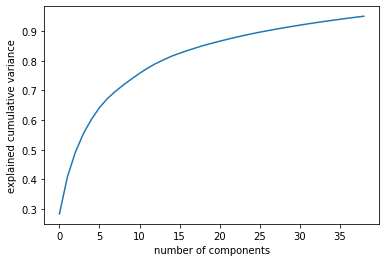

In [154]:
# group param is removed to exclude from prediction algo
group = 'all'
predicted_target = project_vars["prediction_target"]
col2rm = project_vars['group_param']
df_user_stats.drop(columns=[col2rm], inplace=True)
df_final_grid.drop(columns=[col2rm], inplace=True)
df_adjusted.drop(columns=[col2rm], inplace=True)
if col2rm in cols_X:
    cols_X.remove(col2rm)
print(f'y_labeled predicted target is: {predicted_target}, EXCLUDED: {col2rm}, group parameter')

df_X, y_labeled, X_scaled, df_clin_group = get_X_data_per_group_all_groups(group, predicted_target)

# ================================
use_features = True
feature_algo = "PCA"
atlas = "DK"
lang='EN'
features = cols_X #specific for the hoshinolab_proteomics_age project
pca_threshold = 0.95#nimb_stats["STATS_PARAMS"]["prediction_vars"]['pca_threshold']
path2save = '/home/ssp/Desktop'#varia.get_dir(path.join(stats_paths['STATS_HOME'], stats_paths['features'])),
df_with_features, features, features_rfe_and_rank_df = get_features_df_per_group(group, X_scaled, y_labeled,
                                                                                 df_X, pca_threshold,
                                                                                 path2save,use_features)

In [213]:
import matplotlib.pyplot as plt

def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def plot_ecdf(a, b, name_plot, path2save):
    x1, y1 = ecdf(a)
    x1 = np.insert(x1, 0, x1[0])
    y1 = np.insert(y1, 0, 0.)
    x2, y2 = ecdf(b)
    x2 = np.insert(x2, 0, x2[0])
    y2 = np.insert(y2, 0, 0.)
    ax = plt.subplot(111)
    ax.plot(x1, y1, drawstyle='steps-post', label = 'adults')
    ax.plot(x2, y2, drawstyle='steps-post', label = 'children')
    plt.title(name_plot)
    plt.xlabel('concentration')
    plt.ylabel('cumulative distribution function')
    ax.legend()
    plt.grid(True)
    plt.savefig(os.path.join(path2save, f'{name_plot}.png'))
    plt.close()

In [201]:
group1 = 'adults'
group2 = 'children'
df_X1, y_labeled1, X_scaled1, df_clin_group1 = get_X_data_per_group_all_groups(group1, predicted_target)
df_X2, y_labeled2, X_scaled2, df_clin_group2 = get_X_data_per_group_all_groups(group2, predicted_target)

PowerTransformer()
PowerTransformer()


In [214]:
path2save = '/home/ssp/Desktop'
proteins = {'P13671':'Complement comp. C6',
           'P60709':'Actin cytoplasmic 1',
           'O43866':'CD5 antigen-like',
           'P22792':'Carboxypeptidase N',
           'P02745':'Complement C1a subcomp.',
           'P02776':'Platelet factor 4',}
for protein in proteins:
    x1 = df_X1[protein]
    x2 = df_X2[protein]
    plot_ecdf(x1, x2, proteins[protein], path2save)

y_labeled predicted target is: age
PowerTransformer()
    nr of features to analyze by PCA: 2360
    PCA chose 39 components and 35 features 
Q96SB3 not defined
A2BHY4 not defined
B4DN07 not defined
H0Y630 not defined
F8VPF3 not defined
B7Z844 not defined
P23229-7 not defined
P31946 not defined
D9IX69 not defined
B4DTY9 not defined
F5H6R7 not defined
A8MYN5 not defined
Q5HYB6 not defined
P59665 not defined
P01715 not defined
J3KRB5 not defined
H0YMZ1 not defined
P24752 not defined
H7BYG8 not defined
X6R433 not defined
HMPREF0874_00807 not defined
Q58FG0 not defined
G3XAP6 not defined
B1AKP2 not defined
Q8WW52 not defined
O95497 not defined
H0Y4R5 not defined
H0Y3Q6 not defined
Q5JW54 not defined
FSEG_00392 not defined
Q9UJJ9 not defined
A0A087X0Y7 not defined
A0A0A0MT89 not defined
H0Y512 not defined
P01711 not defined


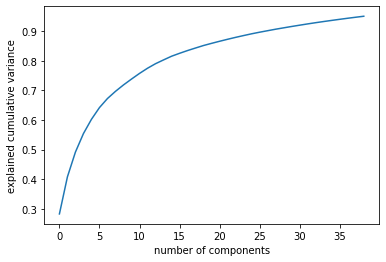

In [229]:
# group param is removed to exclude from prediction algo
group = 'all'
predicted_target = 'age'
if col2rm in cols_X:
    cols_X.remove(col2rm)
print(f'y_labeled predicted target is: {predicted_target}')

df_X, y_labeled, X_scaled, df_clin_group = get_X_data_per_group_all_groups(group, predicted_target)

# ================================
use_features = True
feature_algo = "PCA"
atlas = "DK"
lang='EN'
features = cols_X #specific for the hoshinolab_proteomics_age project
pca_threshold = 0.95#nimb_stats["STATS_PARAMS"]["prediction_vars"]['pca_threshold']
path2save = '/home/ssp/Desktop'#varia.get_dir(path.join(stats_paths['STATS_HOME'], stats_paths['features'])),
df_with_features, features, features_rfe_and_rank_df = get_features_df_per_group(group, X_scaled, y_labeled,
                                                                                 df_X, pca_threshold,
                                                                                 path2save,use_features)

In [232]:
features = cols_X #specific for the hoshinolab_proteomics_age project
skf_NUM_ITER = nimb_stats["STATS_PARAMS"]["prediction_vars"]['skf_NUM_ITER']
loo_NUM_ITER = nimb_stats["STATS_PARAMS"]["prediction_vars"]['NUM_ITER']
print(f'y_labeled predicted target is: {predicted_target}')

STEP_Predict = True
STEP_Predict_RF_SKF = True
STEP_Predict_RF_LOO = True

if STEP_Predict:
    # STEP run Prediction RF SKF
    if STEP_Predict_RF_SKF:
        print('    performing RF SKF Prediction for all groups')
        df_X_scaled = tab.create_df(X_scaled, index_col=range(X_scaled.shape[0]), cols=cols_X)
        accuracy, best_estimator, average_score_list, _ = predict.SKF_algorithm(
                features, df_X_scaled[features].values, y_labeled, skf_NUM_ITER)
        print("    prediction accuracy computed with RF and SKF based on PCA features is: ", best_estimator)
        print("    prediction accuracy computed with RF and SKF based on PCA features is: ", accuracy)

    # STEP run Prediction RF LOO
    if STEP_Predict_RF_LOO:
        print('performing RF Leave-One_out Prediction for all groups')
        df_X_scaled = tab.create_df(X_scaled, index_col=range(X_scaled.shape[0]), cols=cols_X)
        accuracy, best_estimator, average_score_list, _ = predict.LOO_algorithm(
                features, df_X_scaled[features].values, y_labeled, loo_NUM_ITER)
        print("    prediction accuracy computed with RF and LOO based on PCA features is: ", best_estimator)
        print("    prediction accuracy computed with RF and LOO based on PCA features is: ", accuracy)

y_labeled predicted target is: age
    performing RF SKF Prediction for all groups
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=100,
                       max_features='sqrt', random_state=42, verbose=False)
    prediction accuracy computed with RF and SKF based on PCA features is:  RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=100,
                       max_features='sqrt', random_state=42, verbose=False)
    prediction accuracy computed with RF and SKF based on PCA features is:  0.2128205128205128
performing RF Leave-One_out Prediction for all groups
    prediction accuracy computed with RF and LOO based on PCA features is:  RandomForestClassifier(bootstrap=False, max_depth=60, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10, n_estimators=1,
                       random_state=42, verbose=False)
    prediction accuracy computed with RF and LOO based on PCA features is:  0.11475409836065574


In [114]:
# this is to create the working grid from the file with all values
# it also changes NaN to 0
# saving the new file to grid_202002.cdv

materials = '~/Dropbox/20210207_ayuko_lav_exo_ad/materials'
f_src = 'stats_src_all_values.xlsx'
df = pd.read_excel(os.path.join(materials,f_src))
df.drop(list(range(2489,len(df.index))), inplace=True)
df = df.transpose()
df.rename(columns = dict(zip(df.columns.tolist(),df.iloc[0,0:].tolist())), inplace=True)
df.drop('sample name', inplace=True)
df.index.rename('sample name', inplace=True)
df.fillna(0, inplace=True)
df.to_csv(os.path.join(materials, 'grid_202002.csv'))

In [ ]:
# removing columns with zeros
# script is not required, as zeros are numbers

# some cols have zeros and because of them ANOVA cannot be performed.
# this step removes the columns with at least 1 zero

# cols_with_zeros = list()
# for col in df_final_grid.columns:
#     n = df_final_grid[col].isin([0]).sum()
#     if n>0:
#         cols_with_zeros.append(col)
#(df_final_grid == 0).astype(int).sum(axis=0)
#(df_final_grid == 0).sum(axis=1)

# df_final_grid.drop(columns=cols_with_zeros, inplace=True)
